<a href="https://colab.research.google.com/github/Soniasharma1989/PlayStoreAnalysis/blob/main/Copy_of_pplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google playstore app analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#creating dataframe of given csv file
file = '/content/drive/MyDrive/Colab Notebooks/EDA Project/googleplaystore.csv'
df = pd.read_csv(file)

In [9]:
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# getting the features of dataframe
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
#reading top 5 rows of data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df.shape

(10841, 13)

In [14]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


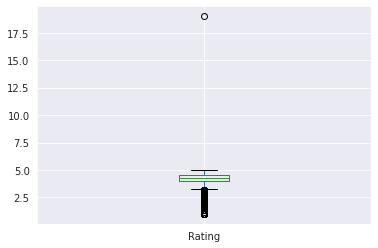

In [15]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f2fd3abd0>]],
      dtype=object)

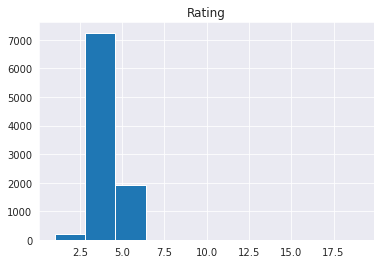

In [16]:
df.hist()

**Data Cleaning**

In [17]:
# reading basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
# knowing the null values if any in all features
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


**Nan values in dataframe**

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
# creating function for extracting diff atrributes of all features
def printinfo():
  temp = pd.DataFrame(index = df.columns)
  temp['data_type'] = df.dtypes
  temp['null_count'] = df.isnull().sum()
  temp['unique_count'] = df.nunique()
  return temp
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [22]:
#getting all data where Rating is Null
df[df.Rating.isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [23]:
#getting data where Type is Null
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
#filling the NaN with space in Type attribute
df['Type'].fillna("Free", inplace = True)

In [25]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Checking how many outliers**


In [26]:
#getting the rows where Content Rating is NaN
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
# Drop the row having Content Rating as NaN
df.drop([10472], inplace = True)

In [28]:
df.loc[10468:10477, : ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


In [29]:
df[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [30]:
df.dropna(subset = ['Content Rating'], inplace=True)


**Drop unwanted columns**

In [31]:
#drop unwanted col 
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)


In [32]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


**Replace missing values of the rating column with mode value**

In [33]:
#Evaluating mode of Rating attribute
mode_value_rating = df['Rating'].mode()

In [34]:
mode_value_rating[0]

4.4

In [35]:
# filling the NaN value of Rating with the Mode
df['Rating'].fillna(value = mode_value_rating[0], inplace = True)

In [36]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [37]:
# changing the type of Reviews as int
df['Reviews'] = df.Reviews.astype(int)


In [38]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [39]:

df['Size'] =df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign from size feature


In [40]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`


In [41]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega


In [42]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo


In [43]:
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [44]:
df['Size'] = pd.to_numeric(df['Size']) # Converting the string to Numeric type


In [45]:
printinfo()


,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [46]:
df.dropna(subset = ['Size'], inplace=True)


In [50]:
printinfo()


,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [53]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+')) # removing + sign from Installs feature


df['Installs'] = df.Installs.apply(lambda x: x.replace(',', '')) # replace ',' with space


df['Installs'] = pd.to_numeric(df['Installs']) # converting Installs to numeric data type
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [54]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [55]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))  # removing $ sign from Price

df['Price'] = pd.to_numeric(df['Price'])
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
df.describe()


,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


**Analysis and visualization**

In [ ]:
printinfo()


,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [56]:
df['Category'].value_counts()  # counting total values for all categories


FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

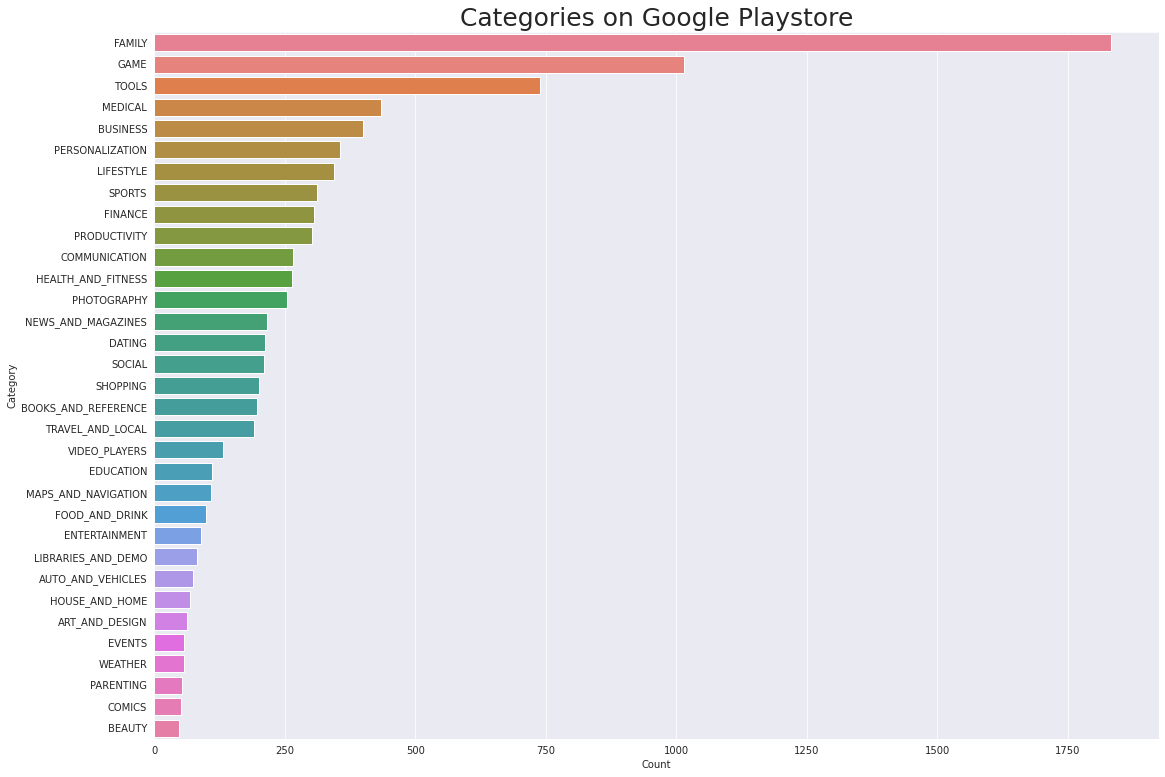

In [57]:
# Ploting graph of all categories with their total counts

y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Categories on Google Playstore", fontsize = 25);

**Which catogory of apps from the content rating column are found more on playstore**

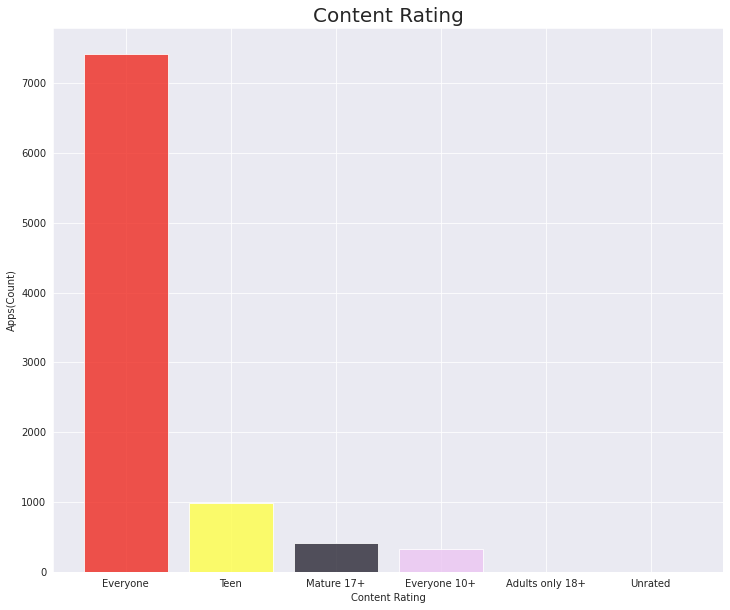

In [58]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()
x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#EF2920','#FFFF48','#292734','#ECC5F2','#CD202D','#15244C'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

In [59]:
df['Rating'].describe()


count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

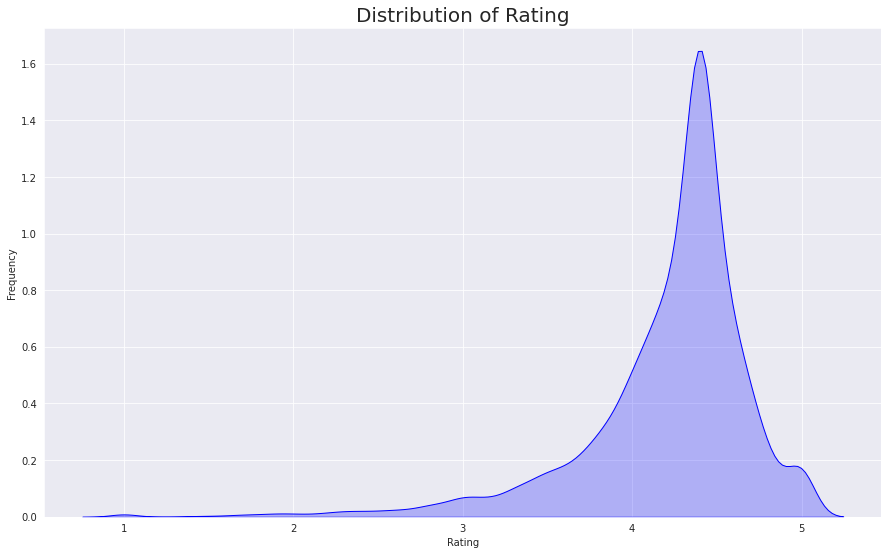

In [60]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

**free apps vs paid apps**

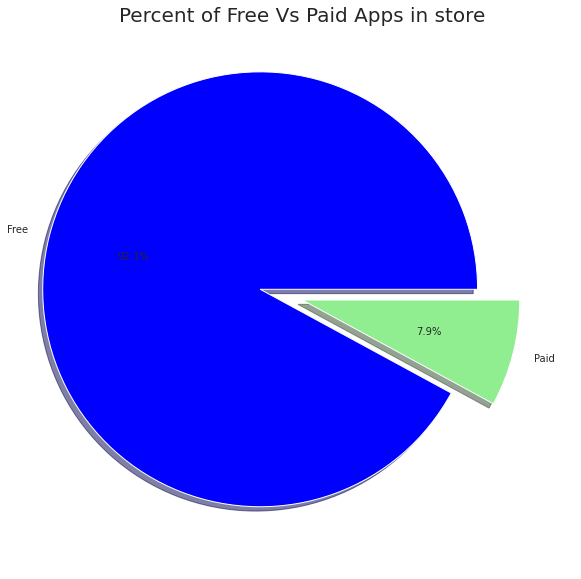

In [61]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [63]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_Installs_df.head()


,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


***most*** **number** **of** **apps** **installs** **in** **given** **category**

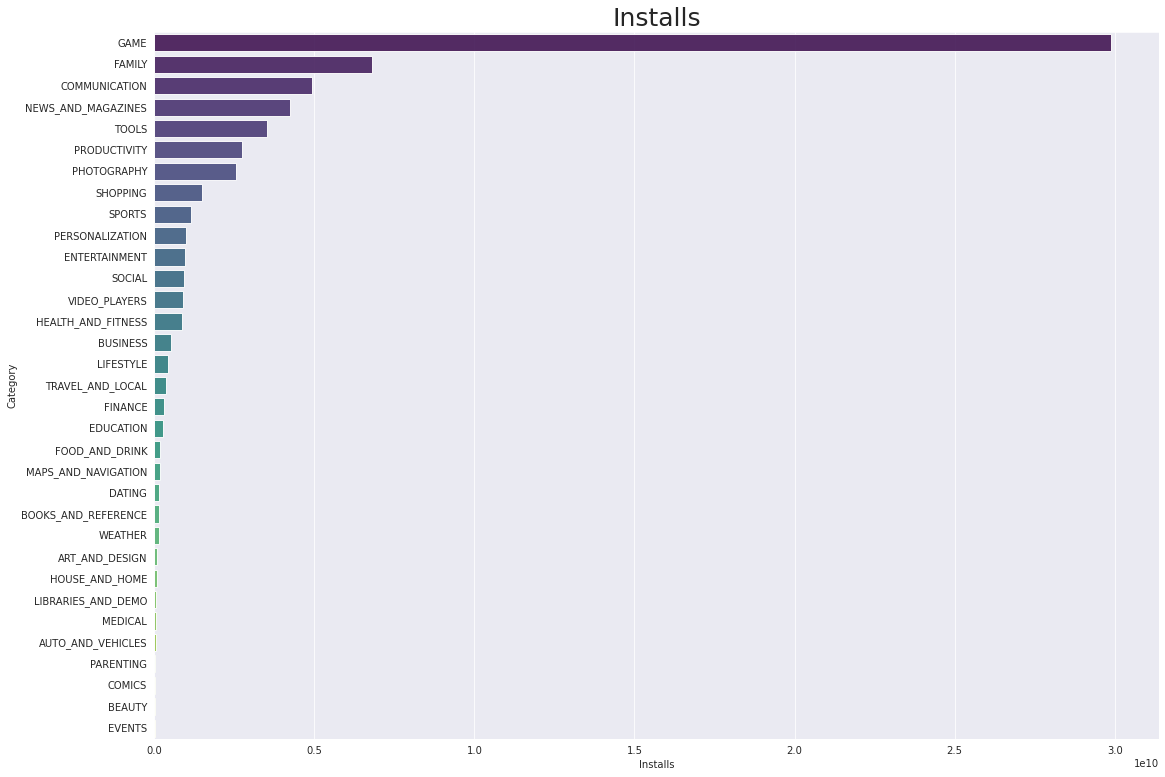

In [64]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Top 10 installed apps**

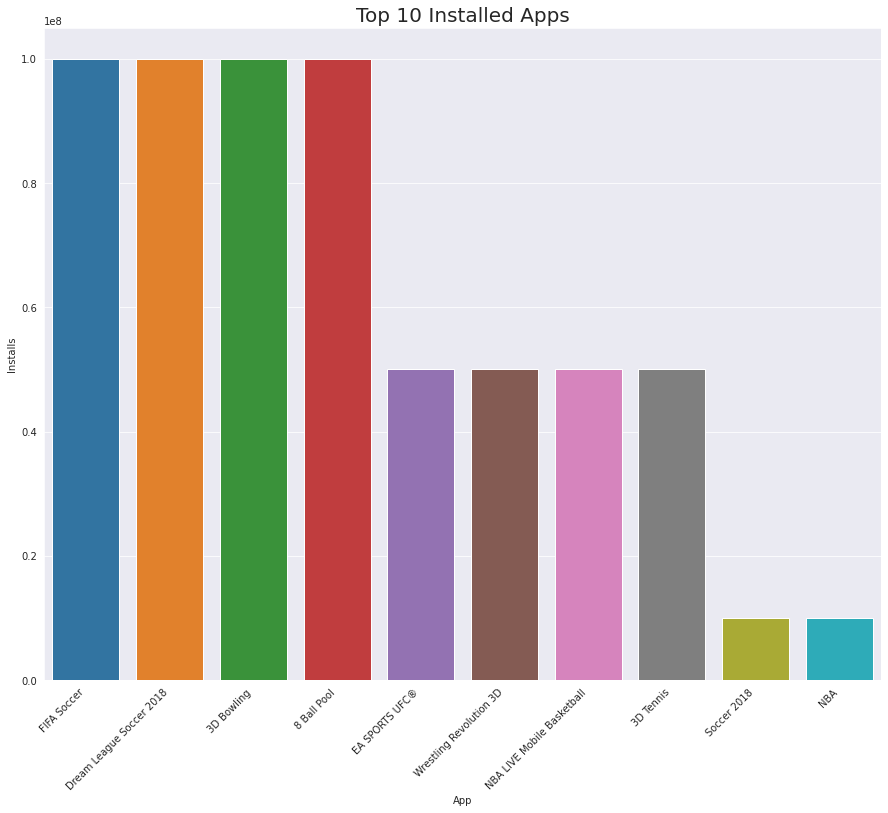

In [65]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');
findtop10incategory('Sports')

In [66]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


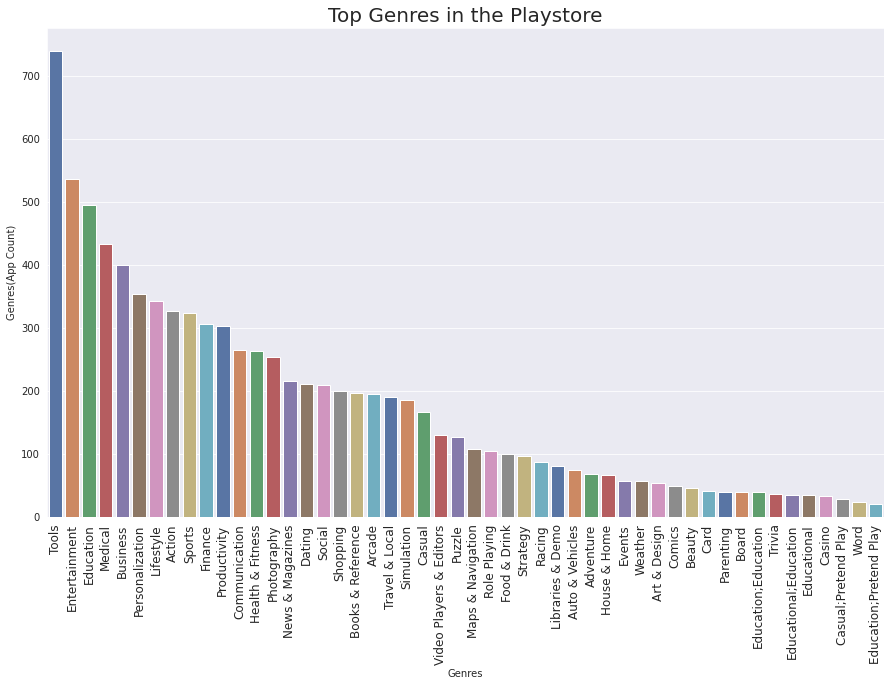

In [67]:
topAppsinGenres = df['Genres'].value_counts().head(50)
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**Top installed apps in any category**

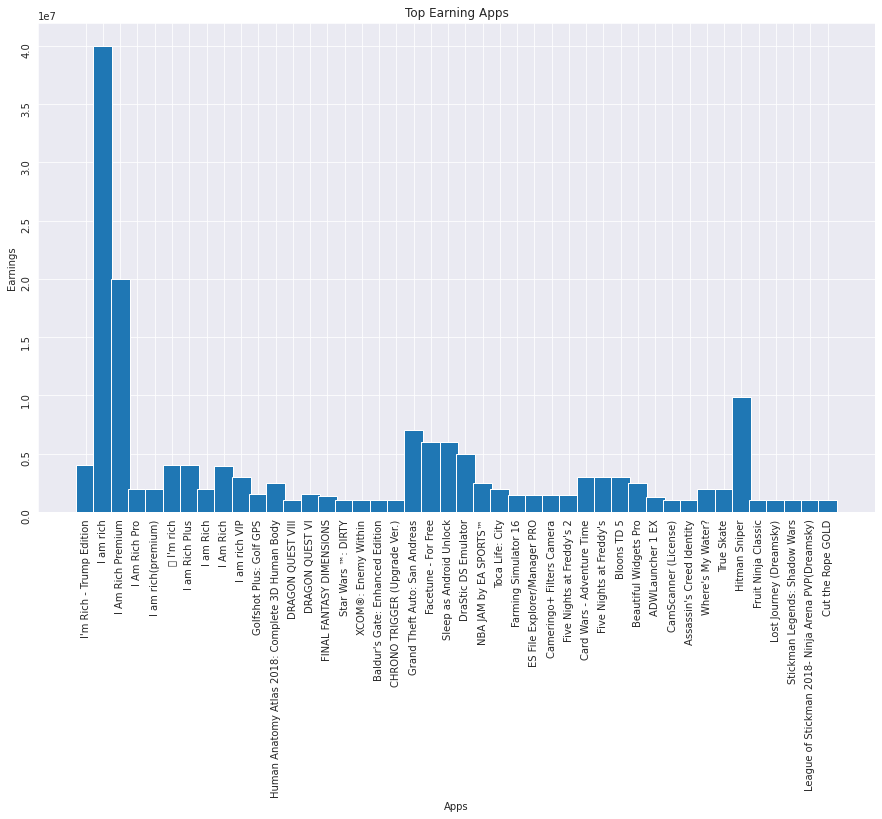

In [68]:
Paid_Apps_df = df[df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

**top expensive apps**

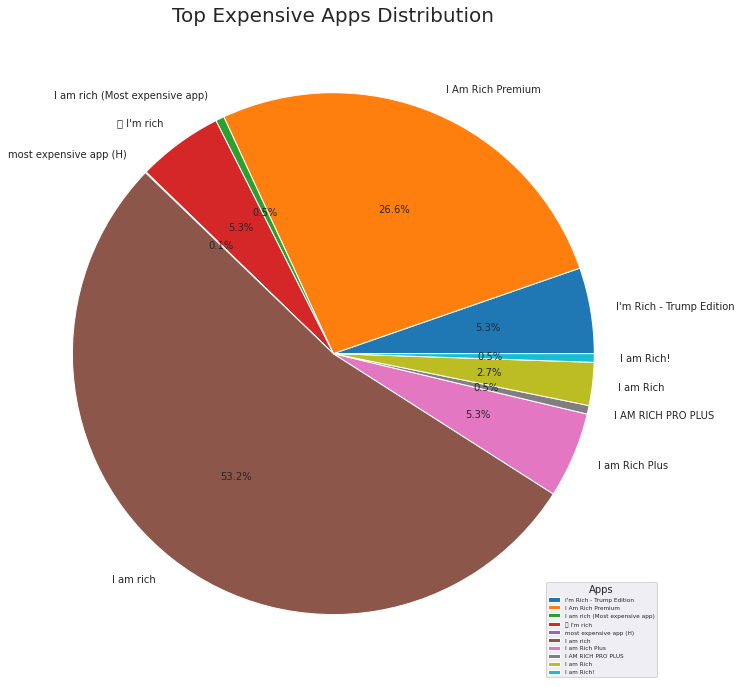

In [69]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small");